In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
#cargar archivo desde seaborn 
df=pd.read_csv('Victoria_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,t,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,f,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,f,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,f,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01


In [78]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,f,Private room in rental unit,Private room,f,1.0,1.0,188.5,5.00
1,100%,t,t,Entire guest suite,Entire home/apt,t,2.0,1.0,175.0,4.87
2,-%,f,f,Entire townhouse,Entire home/apt,f,3.0,1.0,200.0,4.98
3,10%,f,t,Private room in home,Private room,f,5.0,1.0,199.0,4.65
4,75%,f,t,Entire guest suite,Entire home/apt,t,6.0,1.0,135.0,4.78
...,...,...,...,...,...,...,...,...,...,...
3962,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,178.0,5.00
3963,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00
3964,-%,f,f,Entire guesthouse,Entire home/apt,f,4.0,1.0,155.5,5.00
3965,-%,f,t,Entire home,Entire home/apt,f,4.0,1.0,242.0,5.00


In [ ]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#f1['property_type'] = encoder.fit_transform(f1['property_type'])
#f1['property_type'] = f1['property_type'].astype(float)

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_7752\768419520.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_7752\768419520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_7752\768419520.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [80]:
#f2 = Private room
f2= f1[(f1["room_type"] == 2)]

In [81]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 3958
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         602 non-null    float64
 1   host_is_superhost          602 non-null    int64  
 2   host_identity_verified     602 non-null    int64  
 3   property_type              602 non-null    int64  
 4   room_type                  602 non-null    int64  
 5   instant_bookable           602 non-null    int64  
 6   accommodates               602 non-null    float64
 7   bathrooms                  602 non-null    float64
 8   price                      602 non-null    float64
 9   review_scores_cleanliness  602 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 51.7 KB


<Axes: xlabel='room_type', ylabel='price'>

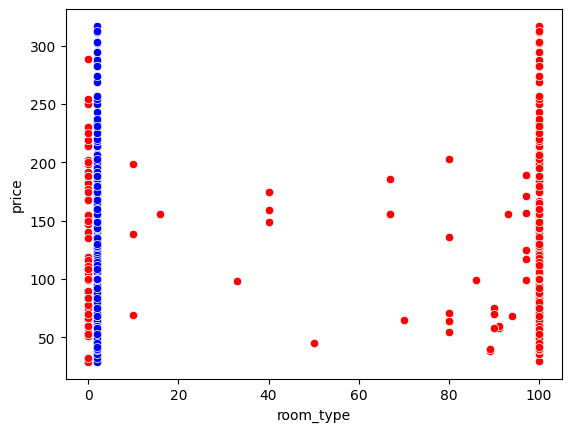

In [82]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

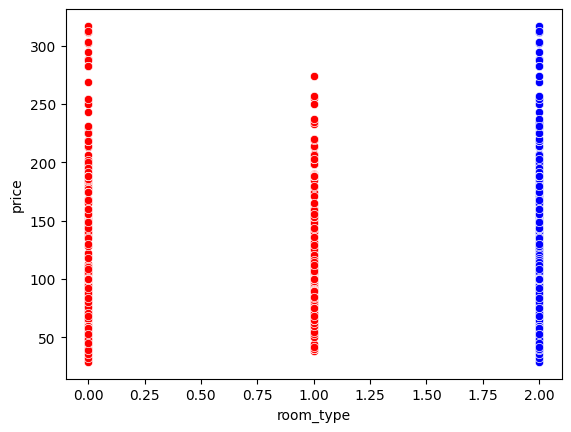

In [83]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

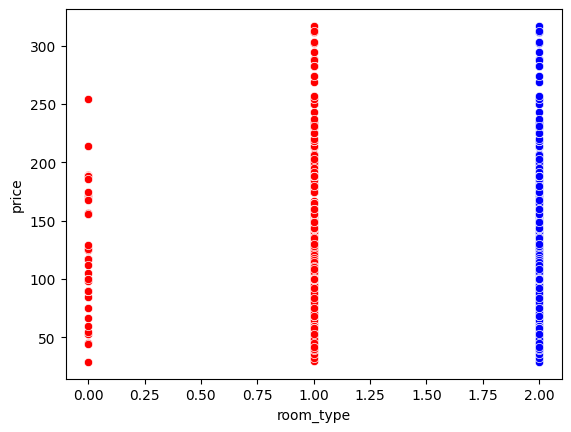

In [84]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

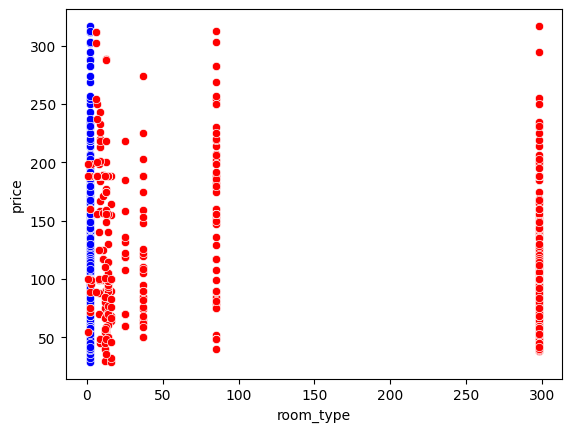

In [85]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

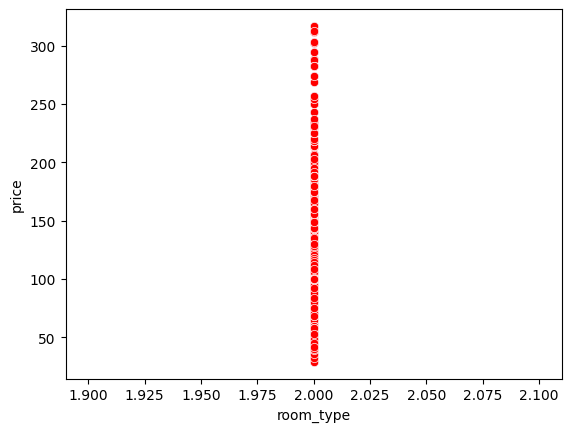

In [86]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

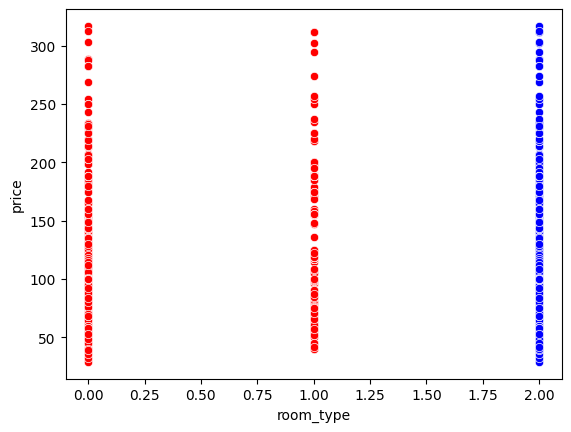

In [87]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

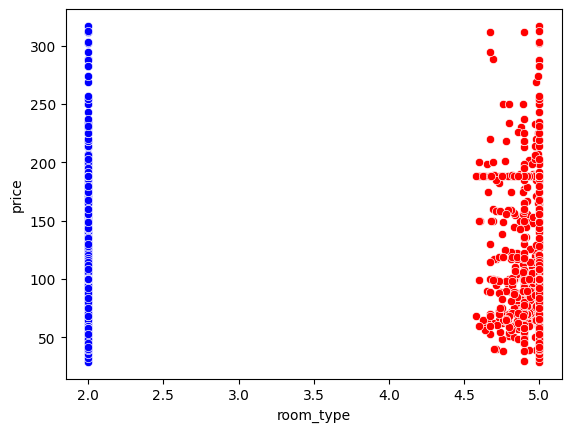

In [88]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

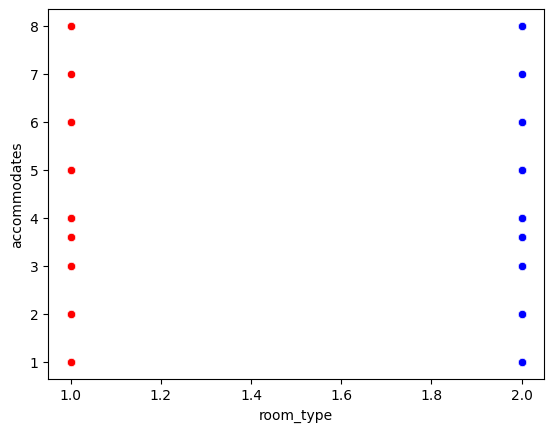

In [89]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [90]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [91]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [92]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [93]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [94]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [95]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.38179156]),
 'rank_': 1,
 'singular_': array([993.03832568]),
 'intercept_': np.float64(153.89495581315853)}

In [96]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-12.07898111]),
 'rank_': 1,
 'singular_': array([12.15350325]),
 'intercept_': np.float64(129.43859649122808)}

In [97]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(124.2217607973422)}

In [98]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-19.14516129]),
 'rank_': 1,
 'singular_': array([7.4575209]),
 'intercept_': np.float64(141.39516129032262)}

In [99]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.0757172]),
 'rank_': 1,
 'singular_': array([3261.2383183]),
 'intercept_': np.float64(136.76842734951128)}

In [100]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.21132155]),
 'rank_': 1,
 'singular_': array([10.88142066]),
 'intercept_': np.float64(121.47386363636365)}

In [101]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([22.44445939]),
 'rank_': 1,
 'singular_': array([2.62133364]),
 'intercept_': np.float64(14.13877129030945)}

In [102]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2.2641196013289036)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [103]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([153.89495581, 150.07704024, 150.07704024, 150.07704024,
       115.71580005, 115.71580005, 115.71580005, 115.71580005,
       153.89495581, 115.71580005, 115.71580005, 115.71580005,
       115.71580005, 115.71580005, 115.71580005, 115.71580005,
       115.71580005, 115.71580005, 153.89495581, 153.89495581,
       115.71580005, 115.71580005, 153.89495581, 115.71580005,
       115.71580005, 115.71580005, 115.71580005, 153.89495581,
       153.89495581, 115.71580005, 153.89495581, 153.89495581,
       115.71580005, 153.89495581, 115.71580005, 115.71580005,
       115.71580005, 115.71580005, 115.71580005, 115.71580005,
       115.71580005, 115.71580005, 153.89495581, 115.71580005,
       115.71580005, 147.78629089, 115.71580005, 115.71580005,
       115.71580005, 115.71580005, 115.71580005, 115.71580005,
       153.89495581, 128.31492145, 115.71580005, 153.89495581,
       115.71580005, 115.71580005, 153.89495581, 115.71580005,
       115.71580005, 115.71580005, 115.71580005, 115.71

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [104]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([129.43859649, 129.43859649, 129.43859649, 129.43859649,
       129.43859649, 117.35961538, 129.43859649, 129.43859649,
       129.43859649, 117.35961538, 129.43859649, 117.35961538,
       117.35961538, 117.35961538, 129.43859649, 129.43859649,
       117.35961538, 117.35961538, 129.43859649, 129.43859649,
       129.43859649, 129.43859649, 129.43859649, 117.35961538,
       117.35961538, 117.35961538, 117.35961538, 129.43859649,
       129.43859649, 129.43859649, 129.43859649, 117.35961538,
       117.35961538, 117.35961538, 117.35961538, 117.35961538,
       129.43859649, 129.43859649, 117.35961538, 129.43859649,
       117.35961538, 117.35961538, 129.43859649, 117.35961538,
       117.35961538, 129.43859649, 117.35961538, 129.43859649,
       117.35961538, 129.43859649, 129.43859649, 117.35961538,
       129.43859649, 129.43859649, 117.35961538, 129.43859649,
       129.43859649, 117.35961538, 129.43859649, 117.35961538,
       117.35961538, 117.35961538, 117.35961538, 117.35

**Modelo matemático y=0x + 11247.1754189944133**

In [105]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2217608,
       124.2217608, 124.2217608, 124.2217608, 124.2217608, 124.2

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [106]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([141.39516129, 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 141.39516129, 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25      ,
       122.25      , 141.39516129, 122.25      , 122.25      ,
       141.39516129, 122.25      , 122.25      , 122.25      ,
       122.25      , 122.25      , 122.25      , 122.25

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [107]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([135.5569522 , 114.20470266, 114.20470266, 114.20470266,
       114.20470266, 114.20470266, 133.96689106, 133.96689106,
       130.33246561, 133.96689106, 130.33246561, 133.96689106,
       130.33246561, 130.33246561, 135.85982099, 135.85982099,
       135.85982099, 135.85982099, 130.33246561, 114.20470266,
       135.85982099, 135.85982099, 114.20470266, 130.33246561,
       130.33246561, 133.96689106, 130.33246561, 114.20470266,
       130.33246561, 114.20470266, 114.20470266, 114.20470266,
       135.70838659, 114.20470266, 130.33246561, 114.20470266,
       136.61699296, 130.33246561, 135.85982099, 133.96689106,
       114.20470266, 114.20470266, 114.20470266, 114.20470266,
       114.20470266, 135.85982099, 114.20470266, 114.20470266,
       136.16268977, 114.20470266, 114.20470266, 114.20470266,
       136.16268977, 130.33246561, 114.20470266, 136.31412417,
       135.5569522 , 136.08697258, 114.20470266, 135.78410379,
       114.20470266, 114.20470266, 136.08697258, 114.20

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [108]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([121.47386364, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       131.68518519, 131.68518519, 131.68518519, 131.68518519,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       131.68518519, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 131.68518519,
       121.47386364, 131.68518519, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 131.68518519,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 121.47386364,
       121.47386364, 121.47386364, 131.68518519, 121.47386364,
       121.47386364, 121.47386364, 121.47386364, 131.68518519,
       121.47386364, 121.47386364, 121.47386364, 131.68518519,
       121.47386364, 121.47386364, 121.47386364, 121.47

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [109]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([126.36106824, 118.50550745, 121.42328717, 120.74995339,
       122.54551014, 122.54551014, 125.23884527, 125.91217905,
       123.66773311, 122.32106555, 122.99439933, 122.99439933,
       123.44328852, 125.46328986, 124.1166223 , 124.1166223 ,
       123.21884392, 126.36106824, 120.3010642 , 125.46328986,
       124.1166223 , 119.85217502, 124.1166223 , 124.56551149,
       123.89217771, 124.34106689, 126.36106824, 117.60772908,
       120.97439799, 126.36106824, 117.38328448, 124.1166223 ,
       124.1166223 , 124.1166223 , 124.34106689, 125.91217905,
       124.1166223 , 124.56551149, 126.13662364, 126.13662364,
       124.1166223 , 124.78995608, 122.76995474, 124.78995608,
       124.1166223 , 124.56551149, 120.97439799, 124.1166223 ,
       123.44328852, 124.1166223 , 124.1166223 , 125.46328986,
       122.76995474, 126.36106824, 124.34106689, 120.5255088 ,
       126.36106824, 125.91217905, 122.54551014, 125.46328986,
       125.91217905, 122.09662095, 125.91217905, 122.09

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [110]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196, 2.2641196,
       2.2641196, 2.2641196, 2.2641196, 2.2641196, 

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [111]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [112]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [113]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [114]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,141.395161,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,122.250000,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,122.250000,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,122.250000,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,122.250000,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,122.250000,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,122.250000,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,122.250000,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,122.250000,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [115]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,141.395161,135.556952,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,122.250000,114.204703,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,122.250000,114.204703,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,122.250000,114.204703,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,122.250000,114.204703,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,122.250000,114.204703,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,122.250000,114.204703,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,122.250000,114.204703,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,122.250000,114.204703,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [116]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,141.395161,135.556952,121.473864,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,122.250000,114.204703,131.685185,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,122.250000,114.204703,121.473864,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [117]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,141.395161,135.556952,121.473864,126.361068,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,118.505507,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,121.423287,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,120.749953,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,122.545510,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,124.116622,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,126.361068,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,122.250000,114.204703,131.685185,126.361068,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,122.250000,114.204703,121.473864,126.361068,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


In [118]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,153.894956,129.438596,124.221761,141.395161,135.556952,121.473864,126.361068,2.26412,0.0,0,0,16,2,0,1.0,1.0,188.5,5.00
3,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,118.505507,2.26412,10.0,0,1,298,2,0,5.0,1.0,199.0,4.65
5,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,121.423287,2.26412,10.0,0,1,298,2,0,3.0,1.0,69.0,4.78
6,150.077040,129.438596,124.221761,122.250000,114.204703,121.473864,120.749953,2.26412,10.0,0,1,298,2,0,2.0,1.0,139.0,4.75
10,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,122.545510,2.26412,100.0,0,1,298,2,0,2.0,1.0,89.0,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,124.116622,2.26412,100.0,0,1,298,2,0,4.0,1.0,160.0,4.90
3924,115.715800,129.438596,124.221761,122.250000,114.204703,121.473864,126.361068,2.26412,100.0,0,1,298,2,0,2.0,1.0,100.0,5.00
3947,115.715800,117.359615,124.221761,122.250000,114.204703,131.685185,126.361068,2.26412,100.0,1,1,298,2,1,1.0,1.0,40.0,5.00
3954,153.894956,129.438596,124.221761,122.250000,114.204703,121.473864,126.361068,2.26412,0.0,0,1,298,2,0,1.0,1.0,84.0,5.00


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

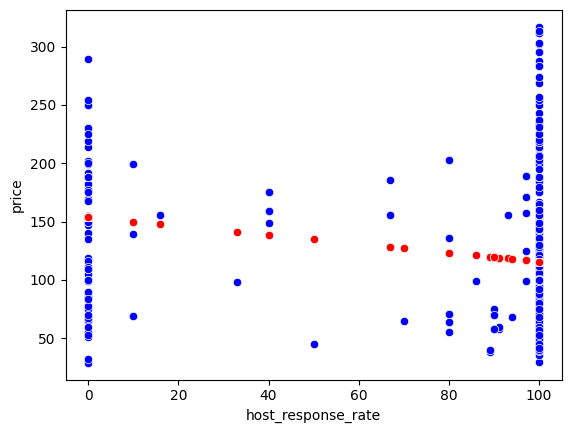

In [119]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

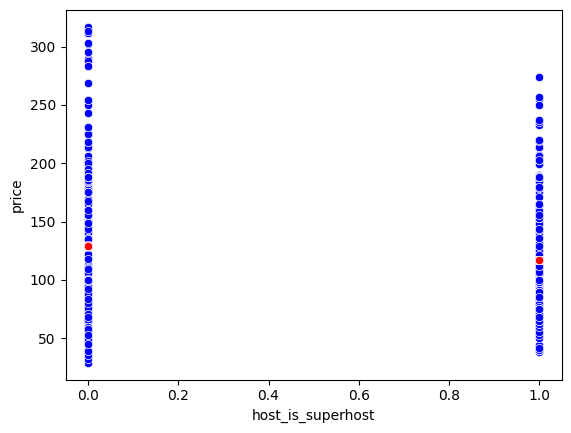

In [120]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

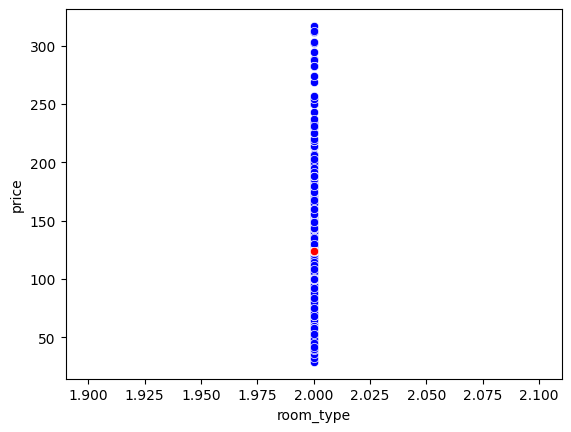

In [121]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

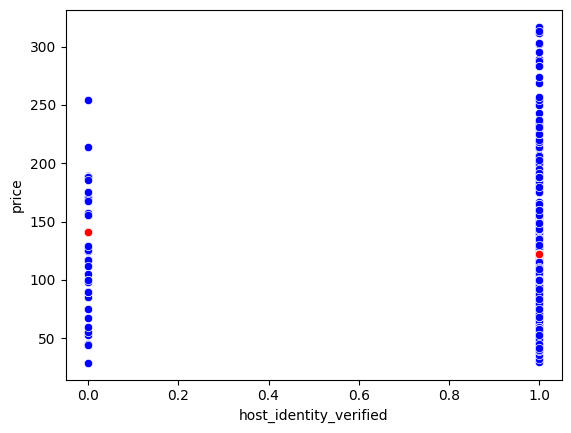

In [122]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

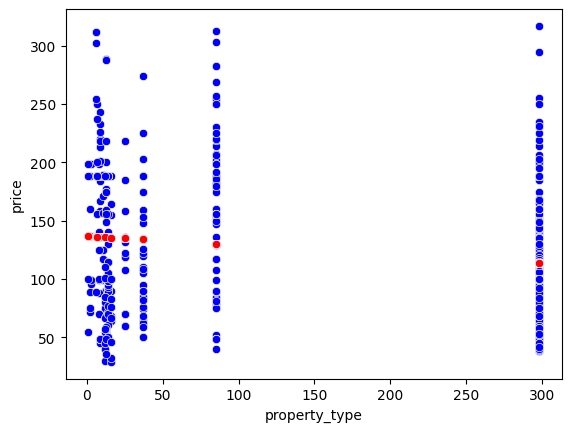

In [123]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

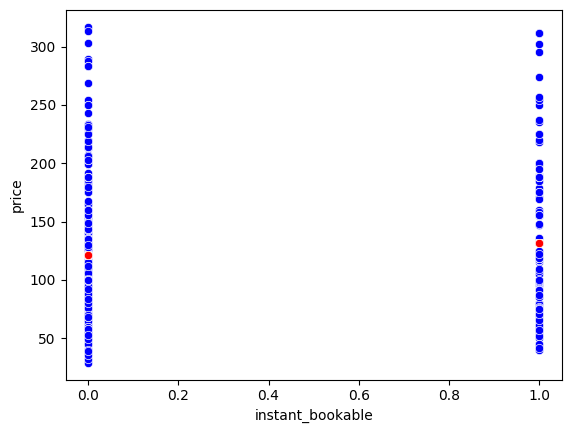

In [124]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

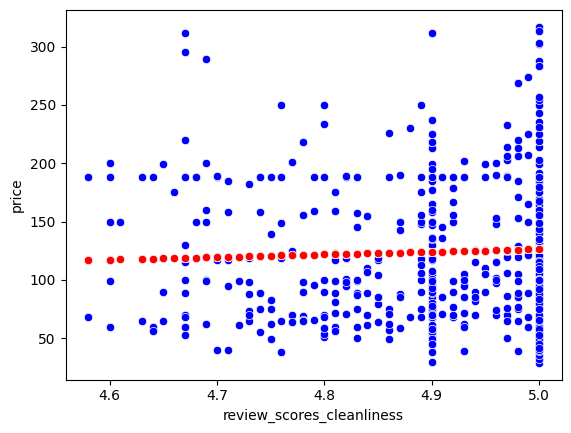

In [125]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

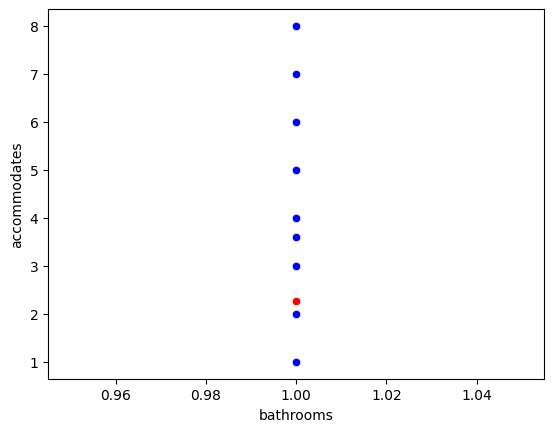

In [126]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [127]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.06271319638934114

In [128]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.00940238090911727

In [129]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [130]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.008893675748754215

In [131]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.026602864573320173

In [132]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.005386533666833948

In [133]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.0015102094157731782

In [134]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.0

**COEFICIENTES DE CORRELACIÓN**

In [135]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.2504260297759423)

In [136]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.09696587497216363)

In [137]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.09696587497216363)

In [138]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.09430628689941203)

In [139]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.16310384597954816)

In [140]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.07339300829666234)

In [141]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.038861412941029023)

In [142]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0)

In [143]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

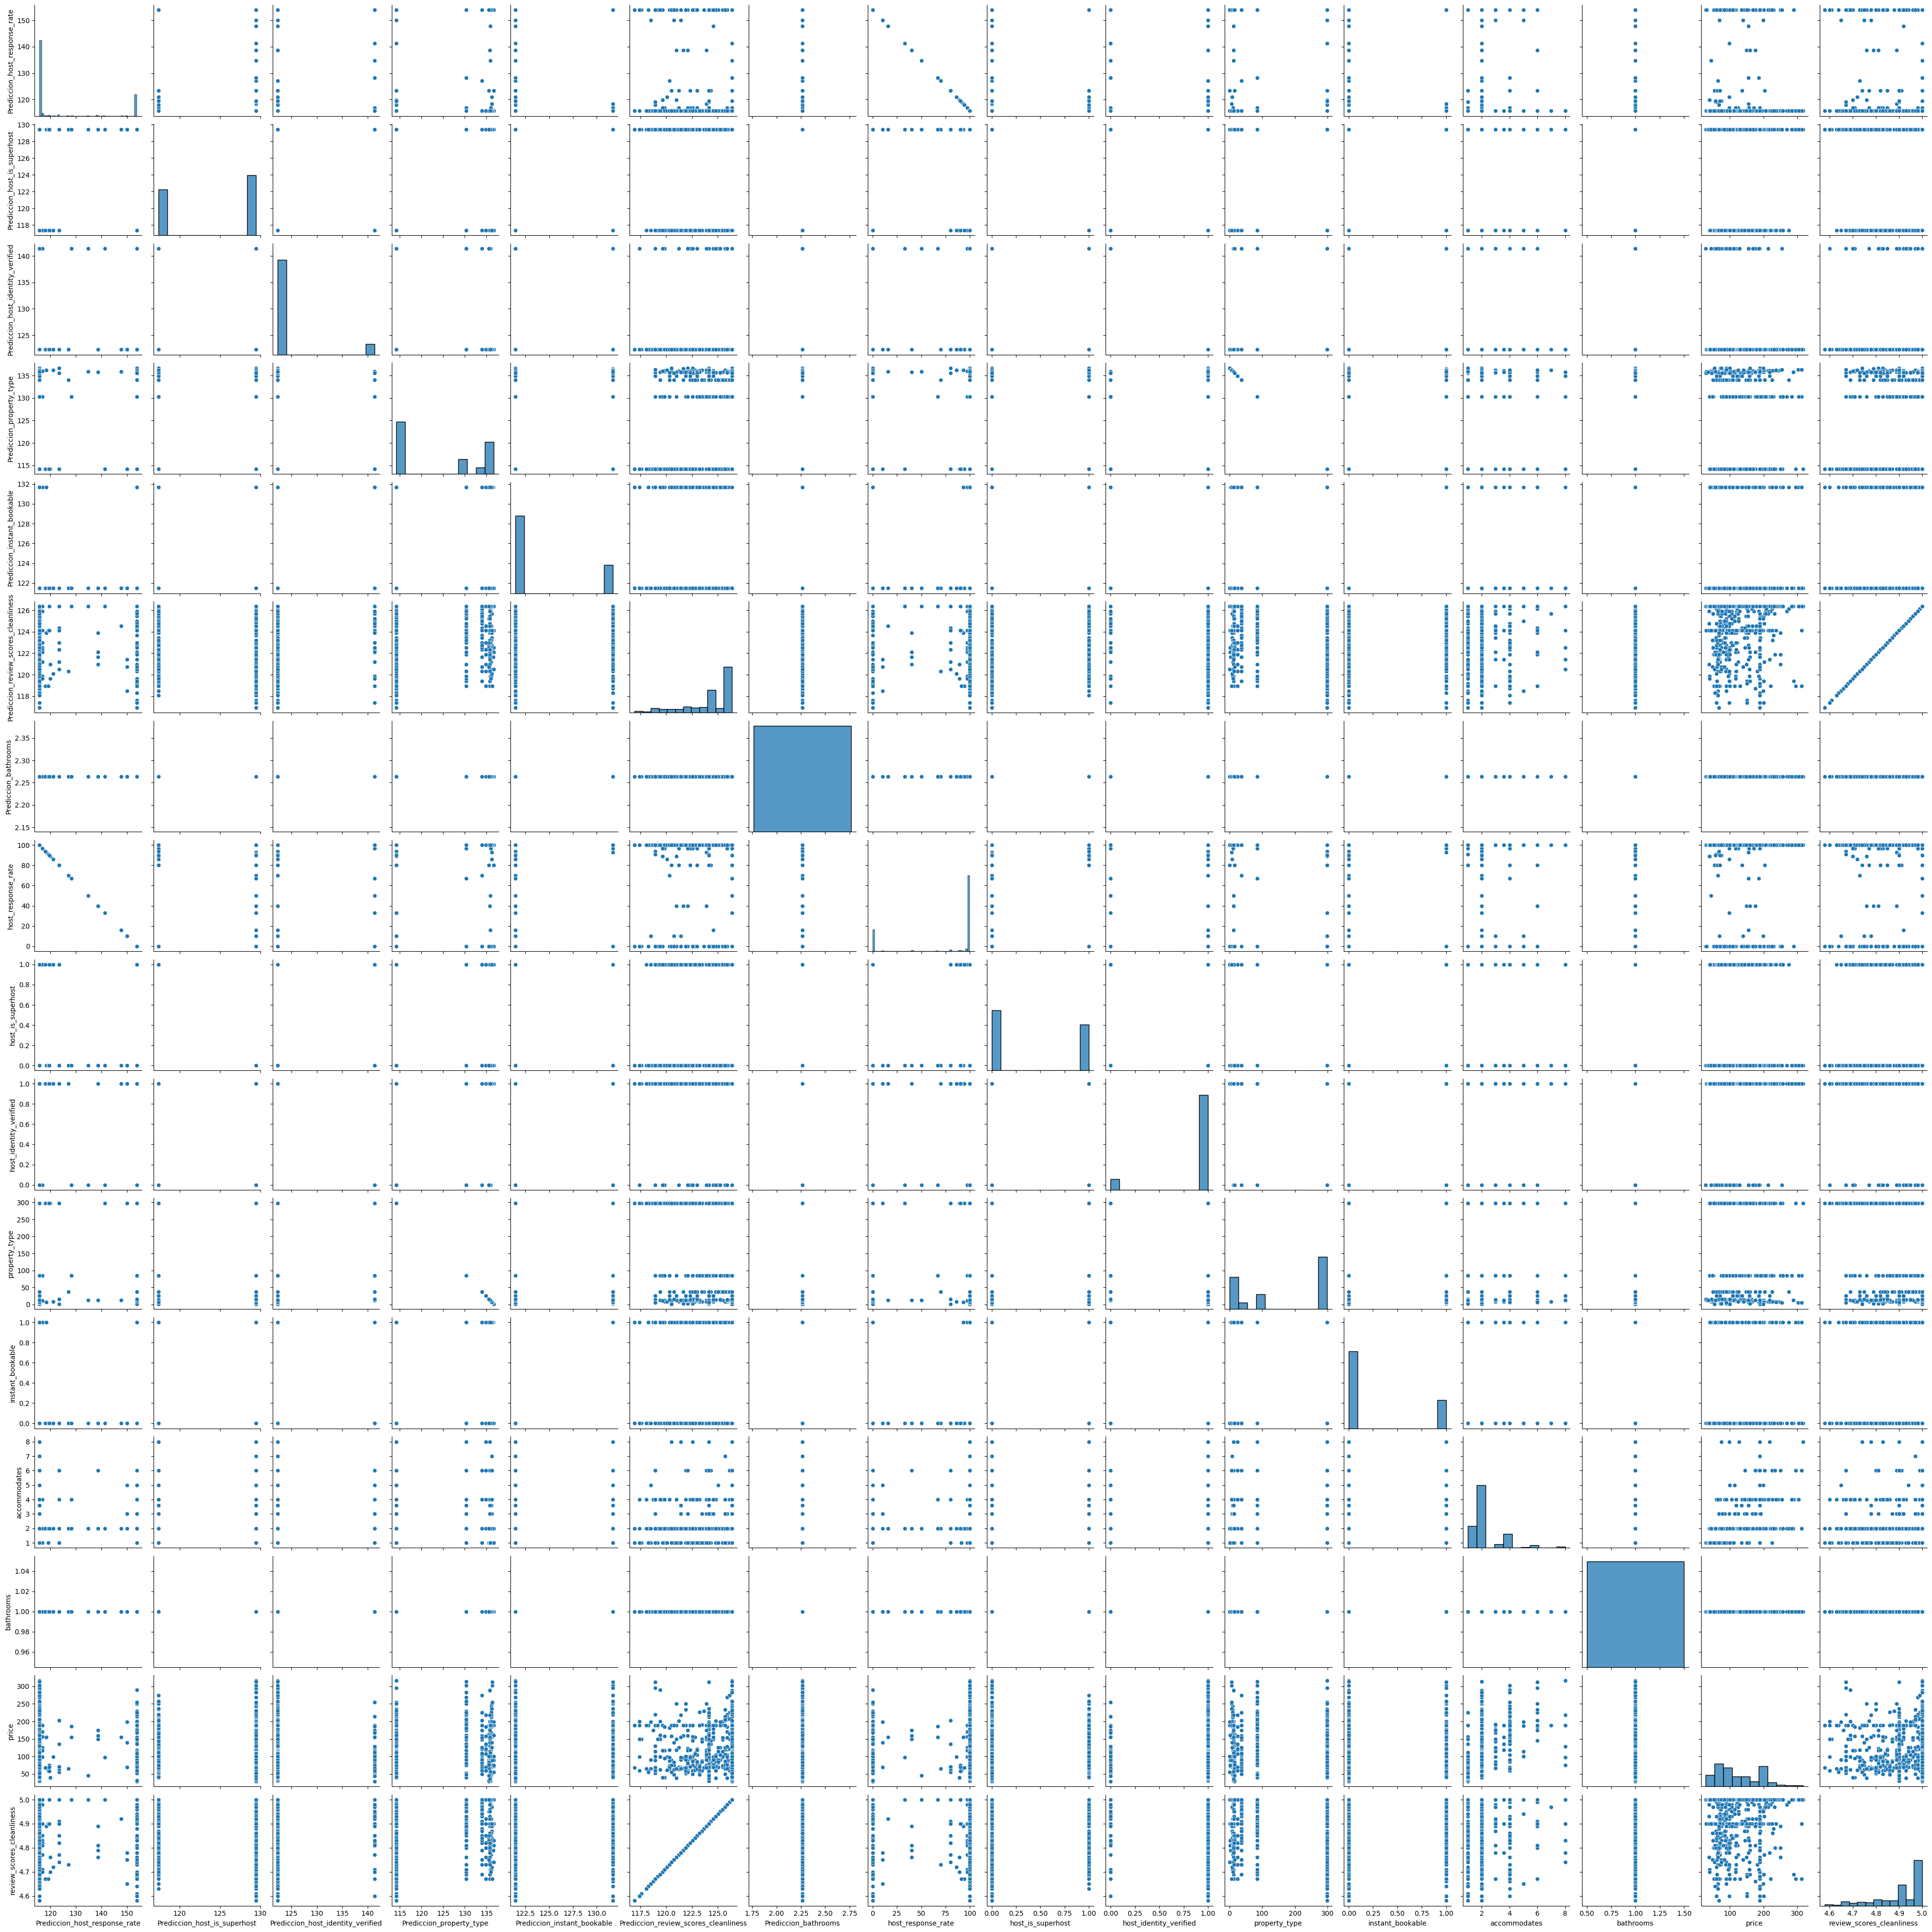

In [144]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [145]:
#Analizar categorias de una columna
df6 = f2.groupby(['bathrooms'])['bathrooms'].count()
df6

bathrooms
1.0    602
Name: bathrooms, dtype: int64

In [146]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.380777,0.280828,-0.083595,-0.125602,0.005406,NaN,-1.000000,-0.380777,-0.280828,0.083595,-0.125602,-0.053823,NaN,0.250426,0.005406
Prediccion_host_is_superhost,0.380777,1.000000,0.052710,-0.013652,-0.166606,-0.032709,NaN,-0.380777,-1.000000,-0.052710,0.013652,-0.166606,-0.005268,NaN,0.096966,-0.032709
Prediccion_host_identity_verified,0.280828,0.052710,1.000000,0.086209,0.040859,0.112006,NaN,-0.280828,-0.052710,-1.000000,-0.086209,0.040859,0.007230,NaN,0.094306,0.112006
Prediccion_property_type,-0.083595,-0.013652,0.086209,1.000000,0.181112,0.084420,NaN,0.083595,0.013652,-0.086209,-1.000000,0.181112,0.139977,NaN,0.163104,0.084420
Prediccion_instant_bookable,-0.125602,-0.166606,0.040859,0.181112,1.000000,-0.090411,NaN,0.125602,0.166606,-0.040859,-0.181112,1.000000,0.158035,NaN,0.073393,-0.090411
Prediccion_review_scores_cleanliness,0.005406,-0.032709,0.112006,0.084420,-0.090411,1.000000,NaN,-0.005406,0.032709,-0.112006,-0.084420,-0.090411,-0.045034,NaN,0.038861,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,-1.000000,-0.380777,-0.280828,0.083595,0.125602,-0.005406,NaN,1.000000,0.380777,0.280828,-0.083595,0.125602,0.053823,NaN,-0.250426,-0.005406
host_is_superhost,-0.380777,-1.000000,-0.052710,0.013652,0.166606,0.032709,NaN,0.380777,1.000000,0.052710,-0.013652,0.166606,0.005268,NaN,-0.096966,0.032709
host_identity_verified,-0.280828,-0.052710,-1.000000,-0.086209,-0.040859,-0.112006,NaN,0.280828,0.052710,1.000000,0.086209,-0.040859,-0.007230,NaN,-0.094306,-0.112006


In [147]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.380777,0.280828,0.083595,0.125602,0.005406,NaN,1.000000,0.380777,0.280828,0.083595,0.125602,0.053823,NaN,0.250426,0.005406
Prediccion_host_is_superhost,0.380777,1.000000,0.052710,0.013652,0.166606,0.032709,NaN,0.380777,1.000000,0.052710,0.013652,0.166606,0.005268,NaN,0.096966,0.032709
Prediccion_host_identity_verified,0.280828,0.052710,1.000000,0.086209,0.040859,0.112006,NaN,0.280828,0.052710,1.000000,0.086209,0.040859,0.007230,NaN,0.094306,0.112006
Prediccion_property_type,0.083595,0.013652,0.086209,1.000000,0.181112,0.084420,NaN,0.083595,0.013652,0.086209,1.000000,0.181112,0.139977,NaN,0.163104,0.084420
Prediccion_instant_bookable,0.125602,0.166606,0.040859,0.181112,1.000000,0.090411,NaN,0.125602,0.166606,0.040859,0.181112,1.000000,0.158035,NaN,0.073393,0.090411
Prediccion_review_scores_cleanliness,0.005406,0.032709,0.112006,0.084420,0.090411,1.000000,NaN,0.005406,0.032709,0.112006,0.084420,0.090411,0.045034,NaN,0.038861,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,1.000000,0.380777,0.280828,0.083595,0.125602,0.005406,NaN,1.000000,0.380777,0.280828,0.083595,0.125602,0.053823,NaN,0.250426,0.005406
host_is_superhost,0.380777,1.000000,0.052710,0.013652,0.166606,0.032709,NaN,0.380777,1.000000,0.052710,0.013652,0.166606,0.005268,NaN,0.096966,0.032709
host_identity_verified,0.280828,0.052710,1.000000,0.086209,0.040859,0.112006,NaN,0.280828,0.052710,1.000000,0.086209,0.040859,0.007230,NaN,0.094306,0.112006


<Axes: >

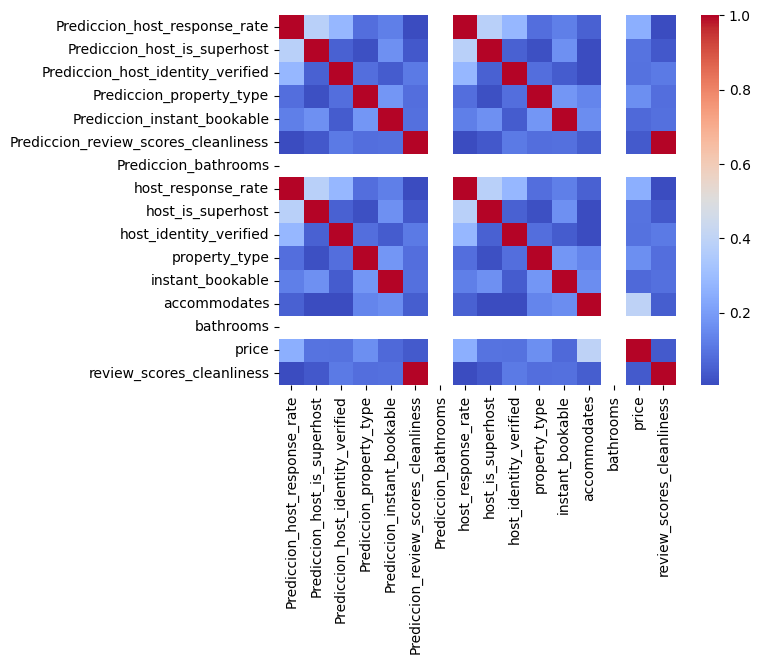

In [148]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

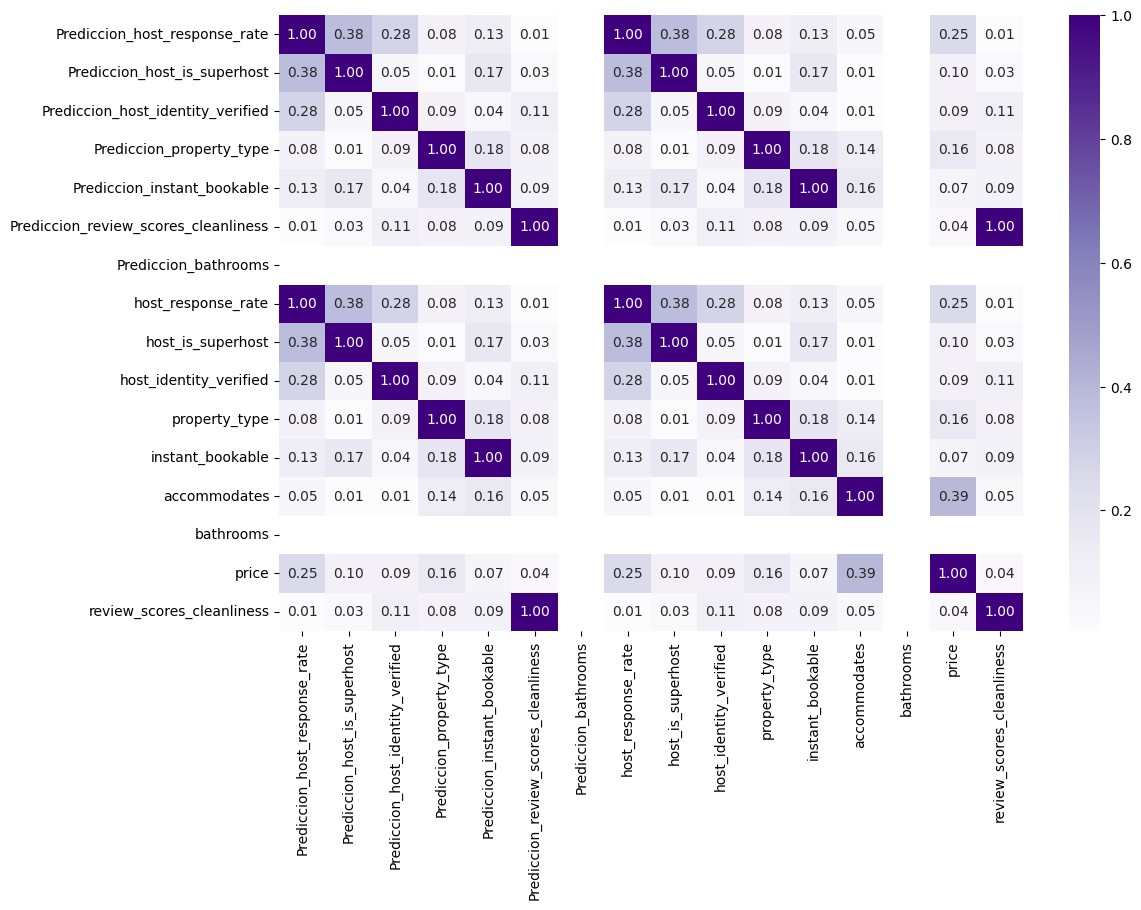

In [149]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [150]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_response_rate: R² = 0.0627
property_type: R² = 0.0266
host_is_superhost: R² = 0.0094
